# Machine Learning 441 - Assignment 1


The following notebook contains...


## Imports


In [6]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

## 1. Data


In [2]:
# Read dateset and replace '?' with NaN
warnings.filterwarnings('ignore')
df = pd.read_excel('DryBeanDataset.xlsx')
df = df.replace('?', np.nan)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


## 2. Table of Features


In [3]:
# Summary of numerical features
df_characteristics_numerical = pd.DataFrame(columns=['Type', 'Range', 'Mean', 'Median', 'Standard Deviation', 'Missing Values'])

# Function to calculate characteristics
def calculate_characteristics(series):
    return {
        'Range': (round(series.min(), 3), round(series.max(), 3)),
        'Mean': round(series.mean(), 3),
        'Median' : round(series.median(), 3),
        'Standard Deviation': round(series.std(), 3),
        'Missing Values': series.isnull().sum()
    }

# Adding characteristics to the DataFrame
df_characteristics_numerical.loc['Area'] = ['int'] + list(calculate_characteristics(df['Area']).values())
df_characteristics_numerical.loc['Perimeter'] = ['float'] + list(calculate_characteristics(df['Perimeter']).values())
df_characteristics_numerical.loc['MajorAxisLength'] = ['float'] + list(calculate_characteristics(df['MajorAxisLength']).values())
df_characteristics_numerical.loc['MinorAxisLength'] = ['float'] + list(calculate_characteristics(df['MinorAxisLength']).values())
df_characteristics_numerical.loc['AspectRation'] = ['float'] + list(calculate_characteristics(df['AspectRation']).values())
df_characteristics_numerical.loc['Eccentricity'] = ['float'] + list(calculate_characteristics(df['Eccentricity']).values())
df_characteristics_numerical.loc['ConvexArea'] = ['int'] + list(calculate_characteristics(df['ConvexArea']).values())
df_characteristics_numerical.loc['EquivDiameter'] = ['float'] + list(calculate_characteristics(df['EquivDiameter']).values())
df_characteristics_numerical.loc['Extent'] = ['float'] + list(calculate_characteristics(df['Extent']).values())
df_characteristics_numerical.loc['Solidity'] = ['float'] + list(calculate_characteristics(df['Solidity']).values())
df_characteristics_numerical.loc['roundness'] = ['float'] + list(calculate_characteristics(df['roundness']).values())
df_characteristics_numerical.loc['Compactness'] = ['float'] + list(calculate_characteristics(df['Compactness']).values())
df_characteristics_numerical.loc['ShapeFactor1'] = ['float'] + list(calculate_characteristics(df['ShapeFactor1']).values())
df_characteristics_numerical.loc['ShapeFactor2'] = ['float'] + list(calculate_characteristics(df['ShapeFactor2']).values())
df_characteristics_numerical.loc['ShapeFactor3'] = ['float'] + list(calculate_characteristics(df['ShapeFactor3']).values())
df_characteristics_numerical.loc['ShapeFactor4'] = ['float'] + list(calculate_characteristics(df['ShapeFactor4']).values())

df_characteristics_numerical

,Type,Range,Mean,Median,Standard Deviation,Missing Values
Area,int,"(20420, 254616)",53048.285,44652.000,29324.096,0
Perimeter,float,"(524.736, 1985.37)",855.283,794.941,214.290,0
MajorAxisLength,float,"(183.601, 738.86)",320.142,296.883,85.694,0
MinorAxisLength,float,"(122.513, 460.198)",202.271,192.432,44.970,0
AspectRation,float,"(1.025, 2.43)",1.583,1.551,0.247,0
Eccentricity,float,"(0.219, 0.911)",0.751,0.764,0.092,0
ConvexArea,int,"(-30, 263261)",53765.693,45178.000,29778.009,0
EquivDiameter,float,"(0.161, 3014441.239)",476.254,238.438,25836.866,0
Extent,float,"(0.555, 0.866)",0.750,0.760,0.049,6
Solidity,float,"(0.919, 0.995)",0.987,0.988,0.005,0


In [4]:
# Summary of categorical features
df_characteristics_categorical = pd.DataFrame(columns=['Type', 'Categories', 'Majority', 'Minority', 'Missing Values'])

def calculate_characteristics_categorical(series):
    return {
        'Categories': series.unique(),
        'Majority': (series.value_counts().idxmax(), round(series.value_counts().max()/series.value_counts().sum(), 2)),
        'Minority': (series.value_counts().idxmin(), round(series.value_counts().min()/series.value_counts().sum(), 2)),
        'Missing Values': series.isnull().sum()
    }

df_characteristics_categorical.loc['Constantness'] = ['binary'] + list(calculate_characteristics_categorical(df['Constantness']).values())
df_characteristics_categorical.loc['Colour'] = ['categorical'] + list(calculate_characteristics_categorical(df['Colour']).values())
df_characteristics_categorical.loc['Class'] = ['categorical'] + list(calculate_characteristics_categorical(df['Class']).values())

df_characteristics_categorical

,Type,Categories,Majority,Minority,Missing Values
Constantness,binary,"[1, 0]","(1, 0.9)","(0, 0.1)",0
Colour,categorical,"[brown, black, green, white, nan]","(brown, 0.45)","(white, 0.14)",6
Class,categorical,"[CALI, DERMASON, SEKER, BOMBAY, SIRA, nan, HOR...","(DERMASON, 0.26)","(BOMBAY, 0.04)",17


## 3. Data Quality Issues


### Missing Values


As can be seen from table \_\_\_ there are missing values present in 4 columns: Extent, Compactness, Colour and Class. Since there is no overlap in the entries containing missing values, a total of 47 entries are incomplete.


### Noise


The following values are found to be incorrect according to the maximum and minimum values for the given feature. In each case the entries shall be removed. The first entry is a convex area of -30. Given that an area cannot be negative, this value is clearly incorrect. The second concerns the equivalent diameter column. Two entries have values of 3014441.24 and 24100.35 respectively. Given that the next largest value is 569.37, these two entries are clear mistakes. Furthermore, the smallest entry has a value of 0.16141 in comparison with the next value of 161.24. Although it is likely that the entry should have been 161.41, to avoid assumptions this value will also be removed.


### Outliers


Next, we focus on outliers present in each of the feature variables. We make use of the Inter Quartile Range (IQR) and consider values outside the range of (25th Percentile–1.5x Inter Quartile Range) to (75th Percentile + 1.5x Inter Quartile Range) as outliers where IQR is defined as 75th Percentile – 25th Percentile. The following table contains the number of valid outliers in each feature variable.


In [24]:
# Table with the number of valid outliers in each feature variable using IQR method
df_outliers = pd.DataFrame(columns=['Outliers'])

def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return series[(series < lower_bound) | (series > upper_bound)].count()

df_outliers.loc['Area'] = calculate_outliers(df['Area'])
df_outliers.loc['Perimeter'] = calculate_outliers(df['Perimeter'])
df_outliers.loc['MajorAxisLength'] = calculate_outliers(df['MajorAxisLength'])
df_outliers.loc['MinorAxisLength'] = calculate_outliers(df['MinorAxisLength'])
df_outliers.loc['AspectRation'] = calculate_outliers(df['AspectRation'])
df_outliers.loc['Eccentricity'] = calculate_outliers(df['Eccentricity'])
df_outliers.loc['ConvexArea'] = calculate_outliers(df['ConvexArea'])
df_outliers.loc['EquivDiameter'] = calculate_outliers(df['EquivDiameter'])
df_outliers.loc['Extent'] = calculate_outliers(df['Extent'])
df_outliers.loc['Solidity'] = calculate_outliers(df['Solidity'])
df_outliers.loc['roundness'] = calculate_outliers(df['roundness'])
df_outliers.loc['Compactness'] = calculate_outliers(df['Compactness'])
df_outliers.loc['ShapeFactor1'] = calculate_outliers(df['ShapeFactor1'])
df_outliers.loc['ShapeFactor2'] = calculate_outliers(df['ShapeFactor2'])
df_outliers.loc['ShapeFactor3'] = calculate_outliers(df['ShapeFactor3'])
df_outliers.loc['ShapeFactor4'] = calculate_outliers(df['ShapeFactor4'])

df_outliers

,Outliers
Area,551
Perimeter,500
MajorAxisLength,379
MinorAxisLength,569
AspectRation,473
Eccentricity,843
ConvexArea,550
EquivDiameter,529
Extent,275
Solidity,778


The remaining type of outliers are those contained in the categorical variables, one of which is also the target variable.


In [9]:
# TODO

### Imbalanced Data


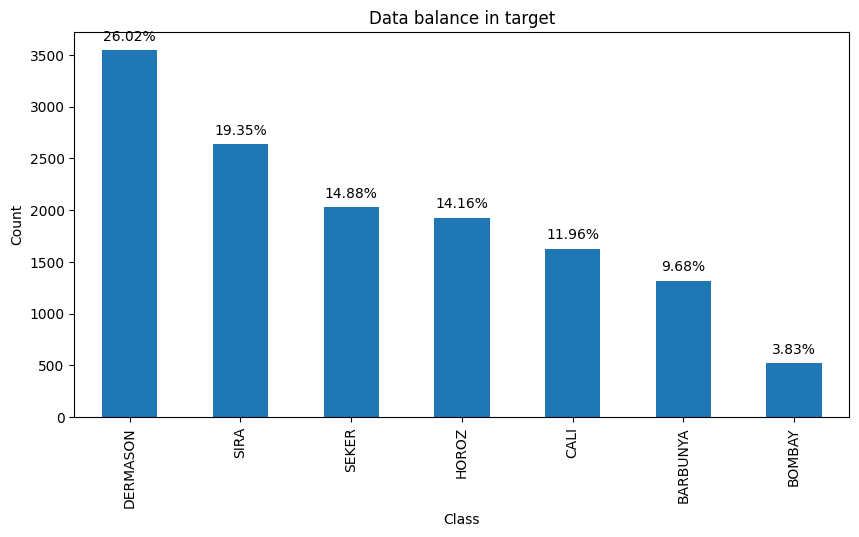

In [8]:
# View Data balance in target using bar plot

import matplotlib.pyplot as plt

# View Data balance in target using bar plot
plt.figure(figsize=(10, 5))
ax = df['Class'].value_counts().plot(kind='bar')
plt.title('Data balance in target')
plt.xlabel('Class')
plt.ylabel('Count')

# Calculate percentages
total = len(df['Class'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# 4. Discuss Algorithm Implementation


## k-NN


## Classification Tree


# 5. Data-preprocessing


## k-NN


## Classification Tree


# 6. Implementation


## k-NN


In [10]:
# TODO: Preprocessing

In [ ]:
# TODO: Implementation

## Classification Tree


In [11]:
# TODO: Preprocessing

In [ ]:
# TODO: Implementation